In [6]:
import together
import dotenv
import os
from IPython.display import display, Image

In [29]:
model_list = together.Models.list()

In [28]:
names_descriptions = [{'name': item['name'], 'description': item['description']} for item in model_list]
for item in name_descriptions:
    print(f"Name: {item['name']}\nDescription: {item['description']}\n")

Name: Austism/chronos-hermes-13b
Description: This model is a 75/25 merge of Chronos (13B) and Nous Hermes (13B) models resulting in having a great ability to produce evocative storywriting and follow a narrative.

Name: BAAI/bge-base-en-v1.5
Description: bge is short for BAAI general embedding, it maps any text to a low-dimensional dense vector using FlagEmbedding

Name: BAAI/bge-large-en-v1.5
Description: bge is short for BAAI general embedding, it maps any text to a low-dimensional dense vector using FlagEmbedding

Name: Gryphe/MythoMax-L2-13b
Description: MythoLogic-L2 and Huginn merge using a highly experimental tensor type merge technique. The main difference with MythoMix is that I allowed more of Huginn to intermingle with the single tensors located at the front and end of a model

Name: Meta-Llama/Llama-Guard-7b
Description: Llama Guard: LLM-based Input-Output Safeguard for Human-AI Conversations

Name: Nexusflow/NexusRaven-V2-13B
Description: NexusRaven is an open-source and 

In [30]:
len(model_list)

164

In [57]:
model = "WizardLM/WizardCoder-Python-34B-V1.0"

prompt = """### Instruction:\nWrite a short children's book about an anthropomorphized bicycle looking for a new owner. 
The bicycle finds a happy kid to ride it. 
Use simple language. 
Avoid using complex sentences and vocabulary. 
Use strong characters. Your characters should be relatable and interesting to children. 
Ensure a well-paced plot. Your story should be engaging and keep children interested. 
Engage with imaginative descriptions. Help children visualize your story by using vivid descriptions. 
\n### Response:\n"""

output = together.Complete.create(
    prompt = prompt,
    model = model,
    max_tokens = 512,
)

In [58]:
print(output['output']['choices'][0]['text'])

Once upon a time, there was a bicycle that was looking for a new owner. It was a nice, shiny bicycle, but it was getting a little tired and worn out. It had been sitting in the same place for a long time, waiting for someone to come along and take it for a ride.

One day, a little boy named Alex spotted the bicycle while he was playing in the park. He was walking with his mom, and he saw it sitting in a tree, rusty and sad-looking. He asked his mom if he could take it home, but she said no. She said that it was too old and needed fixing.

Alex was very sad, but he didn't give up. He kept looking at the bicycle every time he went to the park. One day, he saw a man fixing it up. The man polished it, cleaned it, and fixed the chain. He even painted it a bright red color.

When the man was done, he asked Alex if he wanted to ride it. Alex was so excited! He jumped on the bicycle and rode it all over the park. He rode it to the playground, to the swings, and even all the way to the pond. He

# Test Image generation API

In [86]:
response = together.Image.create(prompt="real dog jumping into the middle of a pool", 
                                 model='stabilityai/stable-diffusion-2-1',
                                results=1,
                                height=512,
                                width=512)

In [9]:
together.api_key = os.getenv("TOGETHER_API_KEY")

In [87]:
img = response["output"]["choices"][0]

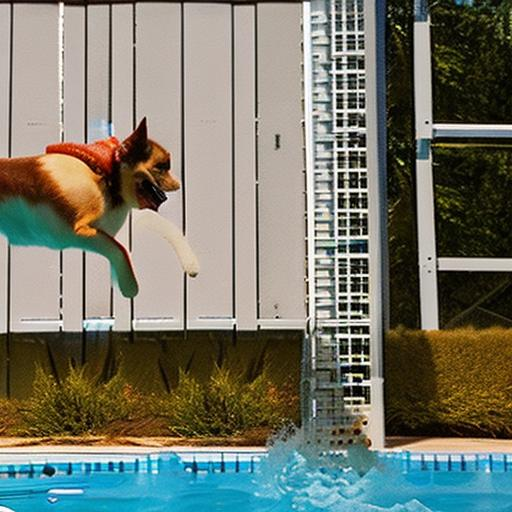

In [88]:
# Assuming 'img' is your base64 image string variable
base64_image_str = img['image_base64']

# If your base64 string includes the data URI scheme, strip it before decoding
if ',' in base64_image_str:
    base64_image_str = base64_image_str.split(',')[1]

# Decode the base64 string
image_data = base64.b64decode(base64_image_str)

# Display the image
display(Image(data=image_data))

In [73]:
response['args']

{'model': 'stabilityai/stable-diffusion-2-1',
 'prompt': 'dog jumping into pool',
 'n': 1,
 'mode': 'text2img',
 'steps': 20,
 'seed': 42,
 'height': 256,
 'width': 256,
 'negative_prompt': ''}

In [74]:
response

{'status': 'finished',
 'prompt': ['dog jumping into pool'],
 'model': 'stabilityai/stable-diffusion-2-1',
 'model_owner': '',
 'tags': {},
 'num_returns': 1,
 'args': {'model': 'stabilityai/stable-diffusion-2-1',
  'prompt': 'dog jumping into pool',
  'n': 1,
  'mode': 'text2img',
  'steps': 20,
  'seed': 42,
  'height': 256,
  'width': 256,
  'negative_prompt': ''},
 'subjobs': [],
 'output': {'choices': [{'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8Q